Missing values before cleaning:
Date               0
Game               0
Turkish_Support    0
Average_Players    0
Peak_Players       0
Review_Score       0
Price_USD          0
dtype: int64 

Missing values after cleaning:
Date               0
Game               0
Turkish_Support    0
Average_Players    0
Peak_Players       0
Review_Score       0
Price_USD          0
dtype: int64 



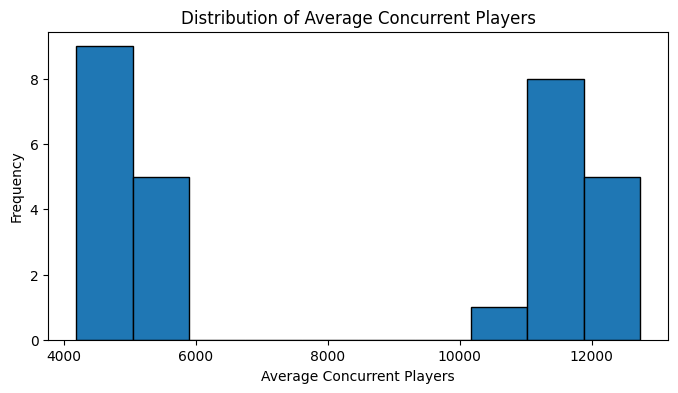

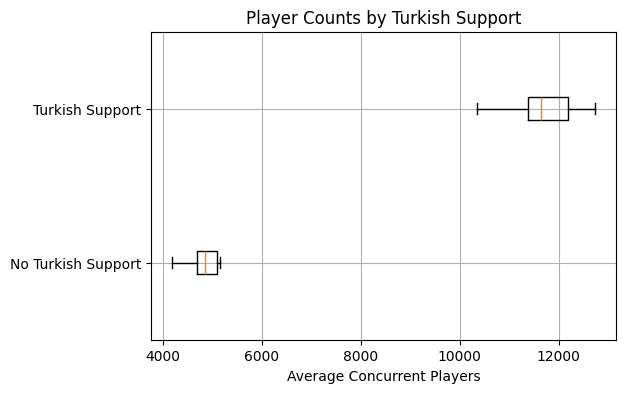

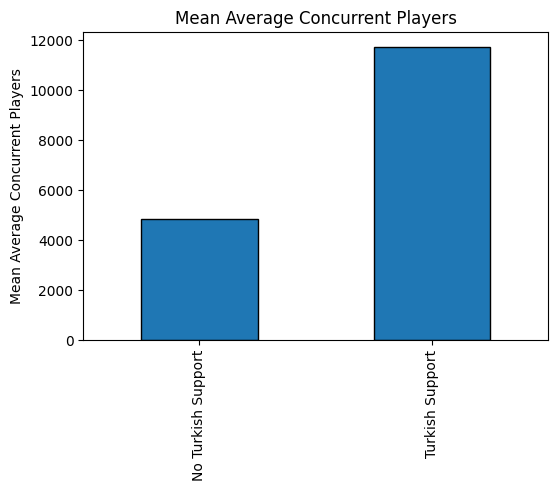

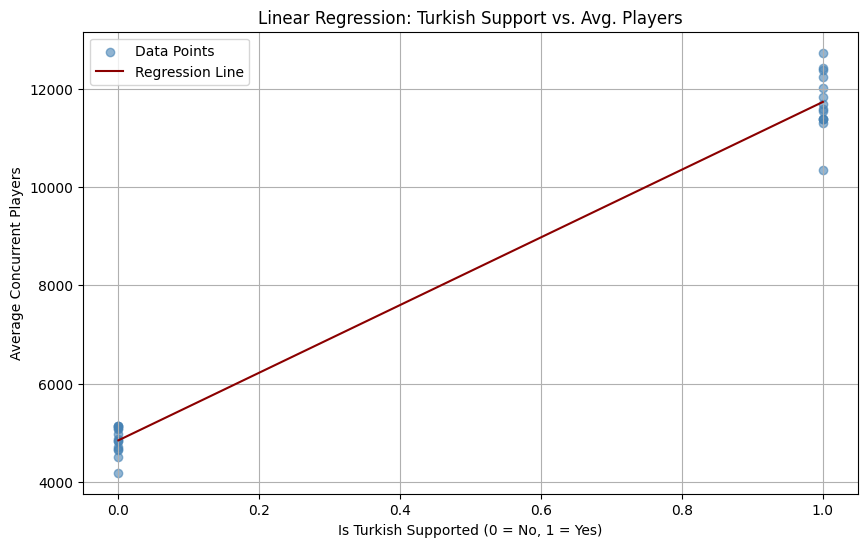

T-statistic: 38.42
P-value: 5.494828e-19
The p-value is less than 0.05. We reject the null hypothesis.
There is a statistically significant increase in average concurrent players for games with Turkish support.

Mean Average Players:
No Turkish Support: 4849.06
Turkish Support:    11730.39


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression

# Read the Excel file
df = pd.read_excel('d210_data.xlsx')

# Rename columns for clarity
df.columns = [
    'Date', 'Game', 'Turkish_Support',
    'Average_Players', 'Peak_Players',
    'Review_Score', 'Price_USD'
]

# Data Cleaning
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("Missing values before cleaning:")
print(df.isnull().sum(), "\n")
df = df.dropna(subset=['Date', 'Game', 'Turkish_Support', 'Average_Players'])
df['Average_Players'] = pd.to_numeric(df['Average_Players'], errors='coerce')
df['Peak_Players'] = pd.to_numeric(df['Peak_Players'], errors='coerce')
df['Price_USD'] = pd.to_numeric(df['Price_USD'], errors='coerce')
df = df.dropna(subset=['Average_Players', 'Peak_Players', 'Price_USD'])

print("Missing values after cleaning:")
print(df.isnull().sum(), "\n")

# Label Turkish support as boolean
df['Is_Turkish_Supported'] = df['Turkish_Support'].str.lower().eq('yes')

# Histogram of Average Players
plt.figure(figsize=(8, 4))
plt.hist(df['Average_Players'], bins=10, edgecolor='black')
plt.title("Distribution of Average Concurrent Players")
plt.xlabel("Average Concurrent Players")
plt.ylabel("Frequency")
plt.show()

# Boxplot comparing groups
turkish = df[df['Is_Turkish_Supported']]['Average_Players']
non_turkish = df[~df['Is_Turkish_Supported']]['Average_Players']

fig, ax = plt.subplots(figsize=(6, 4))
ax.boxplot(
    [non_turkish, turkish],
    vert=False,
    tick_labels=['No Turkish Support', 'Turkish Support']
)
ax.set_xlabel("Average Concurrent Players")
ax.set_title("Player Counts by Turkish Support")
ax.grid(True)
plt.show()

# Bar chart of mean values
means = df.groupby('Is_Turkish_Supported')['Average_Players'].mean()
means.index = ['No Turkish Support', 'Turkish Support']
means.plot(kind='bar', figsize=(6, 4), edgecolor='black')
plt.title("Mean Average Concurrent Players")
plt.ylabel("Mean Average Concurrent Players")
plt.show()

# Linear Regression Plot
X = df['Is_Turkish_Supported'].astype(int).values.reshape(-1, 1)
y = df['Average_Players'].values
model = LinearRegression().fit(X, y)
x_vals = np.array([0, 1]).reshape(-1, 1)
y_preds = model.predict(x_vals)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='steelblue', label='Data Points')
plt.plot(x_vals, y_preds, color='darkred', label='Regression Line')
plt.title("Linear Regression: Turkish Support vs. Avg. Players")
plt.xlabel("Is Turkish Supported (0 = No, 1 = Yes)")
plt.ylabel("Average Concurrent Players")
plt.legend()
plt.grid(True)
plt.show()

# Hypothesis testing
t_stat, p_val = ttest_ind(turkish, non_turkish, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.6e}")

# Interpretation of Hypothesis Test
if p_val < 0.05:
    print("The p-value is less than 0.05. We reject the null hypothesis.")
    print("There is a statistically significant increase in average concurrent players for games with Turkish support.")
else:
    print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.")
    print("There is no statistically significant difference in average concurrent players between games with and without Turkish support.")

# Print group means
print("\nMean Average Players:")
print(f"No Turkish Support: {non_turkish.mean():.2f}")
print(f"Turkish Support:    {turkish.mean():.2f}")